In [4]:
# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Import scipy
from scipy.stats import boxcox
from scipy import stats

In [5]:
full_df=pd.read_csv("fullacc.csv")
#pd.set_option('display.max_columns', None)
full_df.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (19,49,59,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
full_df.shape

(334262, 150)

In [7]:
full_df.dtypes

id                         int64
member_id                float64
loan_amnt                  int64
funded_amnt                int64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 150, dtype: object

In [8]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334262 entries, 0 to 334261
Columns: 150 entries, id to settlement_term
dtypes: float64(105), int64(9), object(36)
memory usage: 382.5+ MB


In [9]:
full_df.describe

<bound method NDFrame.describe of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501        NaN       5000         5000           4975.0   
1        1077430        NaN       2500         2500           2500.0   
2        1077175        NaN       2400         2400           2400.0   
3        1076863        NaN      10000        10000          10000.0   
4        1075358        NaN       3000         3000           3000.0   
...          ...        ...        ...          ...              ...   
334257  89885898        NaN      24000        24000          24000.0   
334258  88977788        NaN      24000        24000          24000.0   
334259  88985880        NaN      40000        40000          40000.0   
334260  88224441        NaN      24000        24000          24000.0   
334261  88215728        NaN      14000        14000          14000.0   

              term  int_rate  installment grade sub_grade  ...  \
0        36 months    0.1065       

# Limit the Feature Space

In [10]:
# Find the count and percentage of missing values
df_na = pd.DataFrame({'Percent': 100*full_df.isnull().sum()/len(full_df), 'Count': full_df.isnull().sum()})

# Print columns with null count > 0
df_na[df_na['Count'] > 0]

,Percent,Count
member_id,100.000000,334262
emp_title,6.405454,21411
emp_length,4.749568,15876
annual_inc,0.001197,4
desc,66.875984,223541
...,...,...
settlement_status,98.510151,329282
settlement_date,98.510151,329282
settlement_amount,98.510151,329282
settlement_percentage,98.510151,329282


In the above dataframe, this displays each column name with a representative value that outlines the percentage of missing values within that specific column. 100% means this column contains no values. 0% means the column is not missing any values. We will remove those columns where more than 2% of the rows for that column contain a null value.

In [11]:
cleaned_data = full_df[[label for label in full_df if full_df[label].isnull().sum() <= 0.02 * full_df.shape[0]]]

In [12]:
cleaned_data.shape

(334262, 56)

In [13]:
cleaned_data.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
home_ownership                   0
annual_inc                       4
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           24
zip_code                         0
addr_state                       0
dti                             28
delinq_2yrs                     29
earliest_cr_line                29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  29
open_acc                        29
pub_rec                         29
revol_bal           

removing additional variables

In [14]:
del_col_names = ["id", "funded_amnt", "funded_amnt_inv", "sub_grade", "int_rate", "url", "policy_code", "pymnt_plan", "title", "zip_code", "addr_state", "delinq_2yrs", "earliest_cr_line", "out_prncp", "application_type", "chargeoff_within_12_mths", "total_rec_int", "total_rec_late_fee", "out_prncp_inv", "delinq_amnt", "hardship_flag", "acc_now_delinq", "debt_settlement_flag", "last_credit_pull_d", "last_pymnt_d", "tax_liens", "collections_12_mths_ex_med", "last_fico_range_high", "last_fico_range_low", "last_pymnt_amnt", "collection_recovery_fee", "recoveries"]

In [15]:
dataset =cleaned_data.drop(labels = del_col_names, axis = 1)

In [16]:
dataset.head()

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,pub_rec_bankruptcies
0,5000,36 months,162.87,B,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,...,3.0,0.0,13648,83.70%,9.0,f,5863.155187,5833.84,5000.00,0.0
1,2500,60 months,59.83,C,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,...,3.0,0.0,1687,9.40%,4.0,f,1014.530000,1014.53,456.46,0.0
2,2400,36 months,84.33,C,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,...,2.0,0.0,2956,98.50%,10.0,f,3005.666844,3005.67,2400.00,0.0
3,10000,36 months,339.31,C,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,...,10.0,0.0,5598,21%,37.0,f,12231.890000,12231.89,10000.00,0.0
4,3000,60 months,67.79,B,RENT,80000.0,Source Verified,Dec-11,Fully Paid,other,...,15.0,0.0,27783,53.90%,38.0,f,4066.908161,4066.91,3000.00,0.0


In [17]:
dataset.shape

(334262, 24)

In order to avoid multicolinearity. We will deleting columns which are highly correlated to one and another.

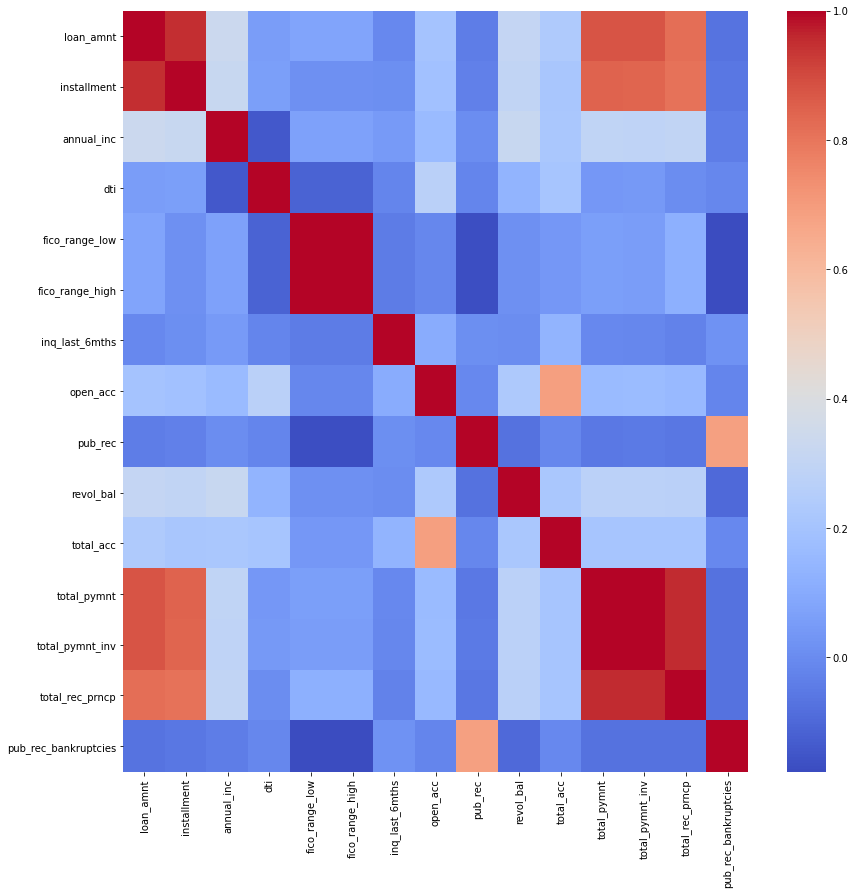

In [18]:
# Set correlation variable
corr = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')

Creating variables based on the data data types:

In [19]:
numb_cols = dataset.select_dtypes(include=("int64","float64"))

cat_cols = dataset.select_dtypes(include=("object"))

In [20]:
def ind_corr(cols):
    for col in cols:
        print(dataset.corr()[col].sort_values(ascending =False).head(3), "\n")
ind_corr(numb_cols.columns)

loan_amnt      1.000000
installment    0.953529
total_pymnt    0.879654
Name: loan_amnt, dtype: float64 

installment    1.000000
loan_amnt      0.953529
total_pymnt    0.844570
Name: installment, dtype: float64 

annual_inc     1.000000
loan_amnt      0.334079
installment    0.322331
Name: annual_inc, dtype: float64 

dti          1.000000
open_acc     0.269998
total_acc    0.206230
Name: dti, dtype: float64 

fico_range_low     1.000000
fico_range_high    1.000000
total_rec_prncp    0.120271
Name: fico_range_low, dtype: float64 

fico_range_high    1.00000
fico_range_low     1.00000
total_rec_prncp    0.12027
Name: fico_range_high, dtype: float64 

inq_last_6mths    1.000000
total_acc         0.135980
open_acc          0.104613
Name: inq_last_6mths, dtype: float64 

open_acc     1.000000
total_acc    0.689576
dti          0.269998
Name: open_acc, dtype: float64 

pub_rec                 1.000000
pub_rec_bankruptcies    0.684487
inq_last_6mths          0.008544
Name: pub_rec, dtype: f

Looks like a lot of features are highly correlated with each and other. Therefore let's get in more depth and remove all the features who are hihly correlated one and other in order to **multicolinearity and overfitting our model with redundant features.

In [21]:
dataset.drop(["installment", "fico_range_low", "total_pymnt_inv", "total_rec_prncp"], axis=1, inplace=True)

In [22]:
dataset.head()

,loan_amnt,term,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,pub_rec_bankruptcies
0,5000,36 months,B,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,0.002765,739,1.0,3.0,0.0,13648,83.70%,9.0,f,5863.155187,0.0
1,2500,60 months,C,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,0.000100,744,5.0,3.0,0.0,1687,9.40%,4.0,f,1014.530000,0.0
2,2400,36 months,C,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,0.000872,739,2.0,2.0,0.0,2956,98.50%,10.0,f,3005.666844,0.0
3,10000,36 months,C,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,0.002000,694,1.0,10.0,0.0,5598,21%,37.0,f,12231.890000,0.0
4,3000,60 months,B,RENT,80000.0,Source Verified,Dec-11,Fully Paid,other,0.001794,699,0.0,15.0,0.0,27783,53.90%,38.0,f,4066.908161,0.0


In [23]:
dataset.shape

(334262, 20)

In [24]:
dataset.set_index

<bound method DataFrame.set_index of         loan_amnt        term grade home_ownership  annual_inc  \
0            5000   36 months     B           RENT     24000.0   
1            2500   60 months     C           RENT     30000.0   
2            2400   36 months     C           RENT     12252.0   
3           10000   36 months     C           RENT     49200.0   
4            3000   60 months     B           RENT     80000.0   
...           ...         ...   ...            ...         ...   
334257      24000   60 months     C       MORTGAGE     95000.0   
334258      24000   60 months     B       MORTGAGE    108000.0   
334259      40000   60 months     B       MORTGAGE    227000.0   
334260      24000   60 months     C           RENT    110000.0   
334261      14000   60 months     C       MORTGAGE     95000.0   

       verification_status issue_d  loan_status             purpose       dti  \
0                 Verified  Dec-11   Fully Paid         credit_card  0.002765   
1       

# Exploratory Analysis

# 1. Loan amount

In [25]:
dataset.loan_amnt.describe()

count    334262.000000
mean      13875.948283
std        8456.075067
min         500.000000
25%        7350.000000
50%       12000.000000
75%       19500.000000
max       40000.000000
Name: loan_amnt, dtype: float64

1.1 Loan amount frequency distribution

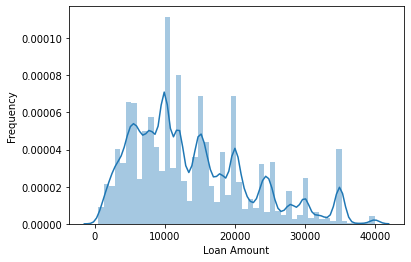

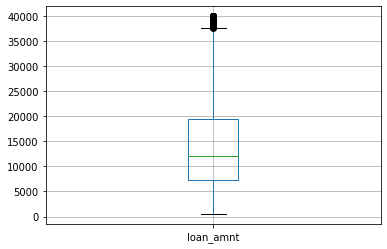

In [26]:
sns.distplot(dataset['loan_amnt'])
plt.ylabel('Frequency')
plt.xlabel('Loan Amount')
plt.show()
q = dataset.boxplot(column='loan_amnt')

1.2 Number of Loans over term

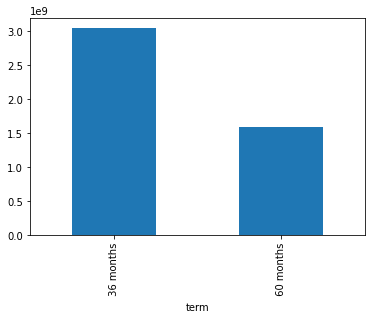

In [27]:
defaulter = 0
non_defaulter = 0
for i in dataset.loan_status:
    if(i in ['Default','Charged Off','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']):
        defaulter+=1
    else:
        non_defaulter+=1

loan_amnt_status = dataset.groupby('term')['loan_amnt'].sum()
loan_amnt_status.plot(kind='bar')

1.3 Distributin of Loan Amount over Purpose

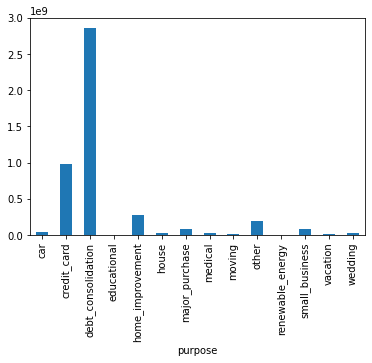

In [28]:
loan_amnt_purpose = dataset.groupby('purpose')['loan_amnt'].sum()
loan_amnt_purpose.plot(kind='bar')

# 2. Term

In [29]:
dataset['term'].value_counts(dropna=False)

 36 months    254366
 60 months     79896
Name: term, dtype: int64

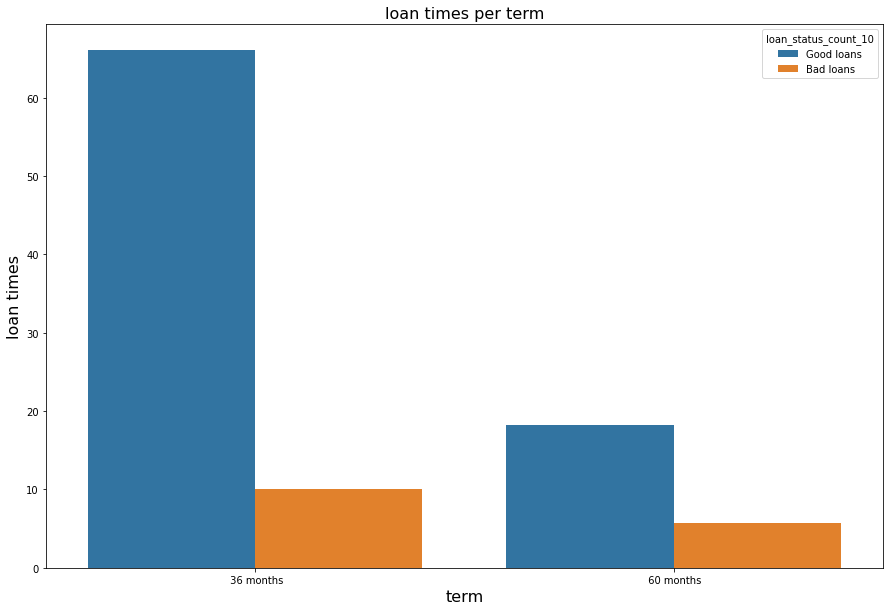

In [30]:
# ratio of short-term and long-term loans for good loans and bad loans
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0, "Does not meet the credit policy. Status:Fully Paid" : 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 0, "Does not meet the credit policy. Status:Charged Off":0}
dataset["loan_status_count_10"] = dataset["loan_status"].map(loan_status_dict)
dataset["loan_status_count_10"] = dataset["loan_status_count_10"].astype("float")
f_loan_status_term, ax_loan_status_term = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
dataset["loan_status_count_10"] = dataset["loan_status_count_10"].map(loan_status_dict)
loan_data_sorted=dataset.sort_values(by=["grade"], inplace=False)
sns.barplot(x=loan_data_sorted["term"], y=loan_data_sorted["loan_amnt"], hue=loan_data_sorted["loan_status_count_10"], hue_order=labels,
            ax=ax_loan_status_term, estimator=lambda x: len(x) / len(loan_data_sorted["loan_status_count_10"]) * 100)
ax_loan_status_term.set_title("loan times per term", fontsize=16)
ax_loan_status_term.set_xlabel("term", fontsize=16)
ax_loan_status_term.set_ylabel("loan times", fontsize=16)
plt.show()
plt.close()
dataset.drop(["loan_status_count_10"], axis=1, inplace=True)

# 3. Grade

In [31]:
print(sorted(dataset['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


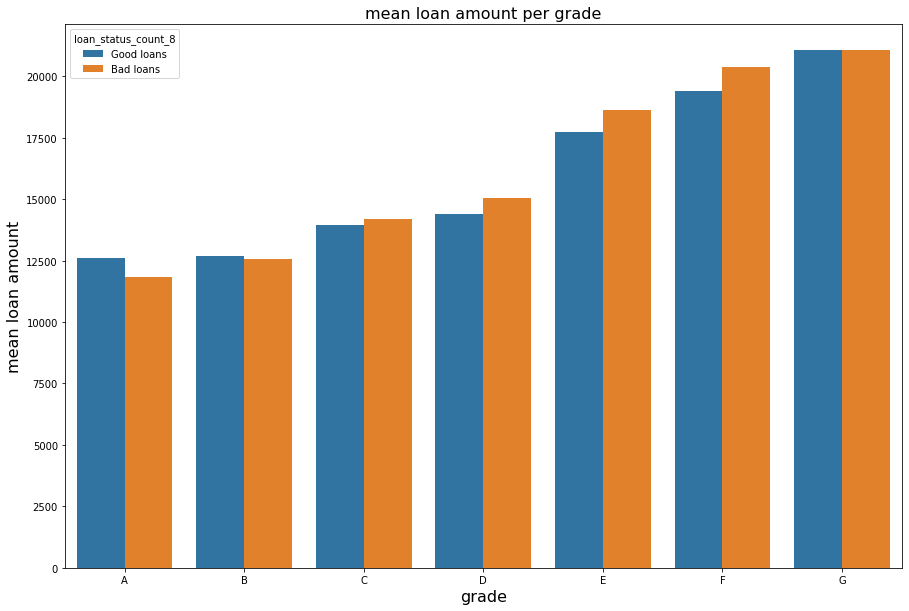

In [32]:
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0, "Does not meet the credit policy. Status:Fully Paid" : 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 0, "Does not meet the credit policy. Status:Charged Off":0}
dataset["loan_status_count_8"] = dataset["loan_status"].map(loan_status_dict)
dataset["loan_status_count_8"] = dataset["loan_status_count_8"].astype("float")
f_inc_rate_grade, ax_inc_rate_grade = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
dataset["loan_status_count_8"] = dataset["loan_status_count_8"].map(loan_status_dict)
loan_data_sorted = dataset.sort_values(by=["grade"], inplace=False)
sns.barplot(x=loan_data_sorted["grade"], y=loan_data_sorted["loan_amnt"], hue=loan_data_sorted["loan_status_count_8"],
            hue_order=labels, ax=ax_inc_rate_grade, ci=None)
ax_inc_rate_grade.set_title("mean loan amount per grade", fontsize=16)
ax_inc_rate_grade.set_xlabel("grade", fontsize=16)
ax_inc_rate_grade.set_ylabel("mean loan amount", fontsize=16)
plt.show()
plt.close()
dataset.drop(["loan_status_count_8"], axis=1, inplace=True)

# 4. Home Ownership

In [33]:
dataset['home_ownership'].value_counts()

MORTGAGE    166740
RENT        136303
OWN          30883
OTHER          182
ANY            104
NONE            50
Name: home_ownership, dtype: int64

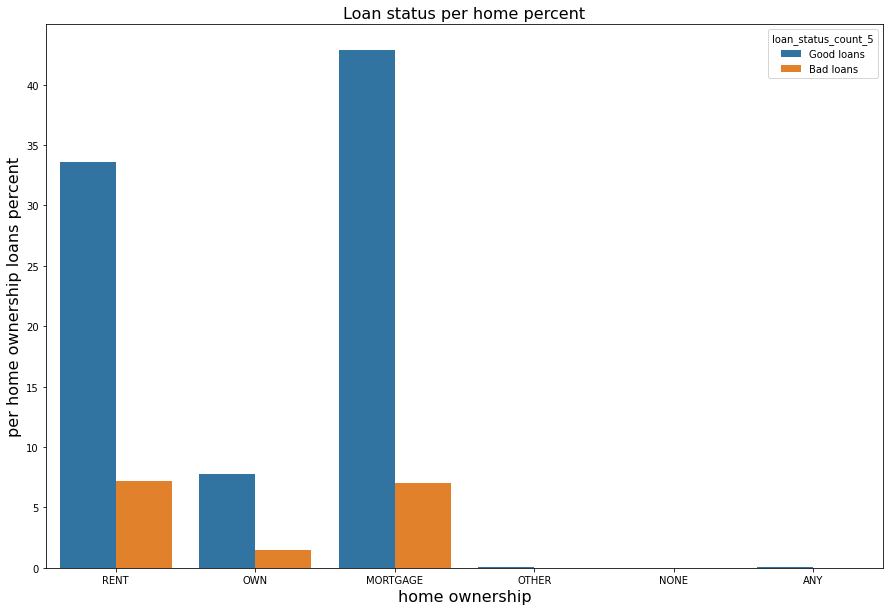

In [34]:
# ratio of housing for good loans customer and bad loans customer
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0, "Does not meet the credit policy. Status:Fully Paid" : 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 0, "Does not meet the credit policy. Status:Charged Off":0}
dataset["loan_status_count_5"] = dataset["loan_status"].map(loan_status_dict)
dataset["loan_status_count_5"] = dataset["loan_status_count_5"].astype("float")
f_loan_status_home, ax_loan_status_home = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
dataset["loan_status_count_5"] = dataset["loan_status_count_5"].map(loan_status_dict)
sns.barplot(x=dataset["home_ownership"], y=dataset["loan_amnt"], hue=dataset["loan_status_count_5"],
            hue_order=labels,
            ax=ax_loan_status_home, estimator=lambda x: len(x) / len(dataset["loan_status_count_5"]) * 100)
ax_loan_status_home.set_title("Loan status per home percent", fontsize=16)
ax_loan_status_home.set_xlabel("home ownership", fontsize=16)
ax_loan_status_home.set_ylabel("per home ownership loans percent", fontsize=16)
plt.show()
plt.close()
dataset.drop(["loan_status_count_5"], axis=1, inplace=True)

# 5. Annual Income

In [35]:
dataset.annual_inc.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count    3.342580e+05
mean     7.447377e+04
std      6.245915e+04
min      0.000000e+00
10%      3.376790e+04
25%      4.500000e+04
50%      6.324000e+04
75%      9.000000e+04
90%      1.225132e+05
max      7.141778e+06
Name: annual_inc, dtype: float64

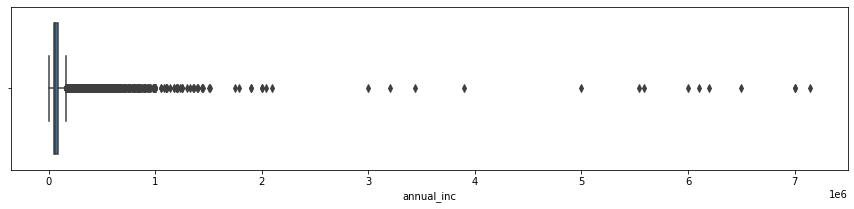

In [36]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=dataset['annual_inc'], data=dataset)

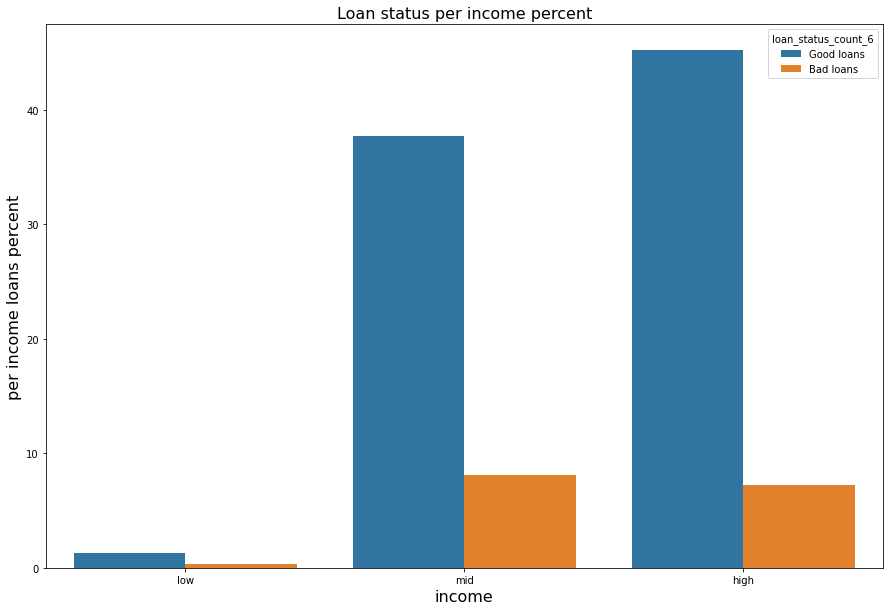

In [37]:
# ratio of good loans and bad loans for each income level
# 我们将年收入分为三档:20000以下为low，20000-60000为mid，>60000为high
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0, "Does not meet the credit policy. Status:Fully Paid" : 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 0, "Does not meet the credit policy. Status:Charged Off":0}
dataset["loan_status_count_6"] = dataset["loan_status"].map(loan_status_dict)
dataset["loan_status_count_6"] = dataset["loan_status_count_6"].astype("float")
max_value = dataset["annual_inc"].max() + 1.0
set_bins = [0.0, 20000.0, 60000.0, max_value]
set_label = ["low", "mid", "high"]
dataset["income"] = pd.cut(dataset["annual_inc"], bins=set_bins, labels=set_label)
f_loan_status_income, ax_loan_status_income = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
dataset["loan_status_count_6"] = dataset["loan_status_count_6"].map(loan_status_dict)
sns.barplot(x=dataset["income"], y=dataset["loan_amnt"], hue=dataset["loan_status_count_6"], hue_order=labels,
            ax=ax_loan_status_income, estimator=lambda x: len(x) / len(dataset["loan_status_count_6"]) * 100)
ax_loan_status_income.set_title("Loan status per income percent", fontsize=16)
ax_loan_status_income.set_xlabel("income", fontsize=16)
ax_loan_status_income.set_ylabel("per income loans percent", fontsize=16)
plt.show()
plt.close()
dataset.drop(["loan_status_count_6","income"], axis=1, inplace=True)

# 6 verification_status

In [38]:
dataset.verification_status.value_counts()

Verified           131804
Not Verified       107818
Source Verified     94640
Name: verification_status, dtype: int64

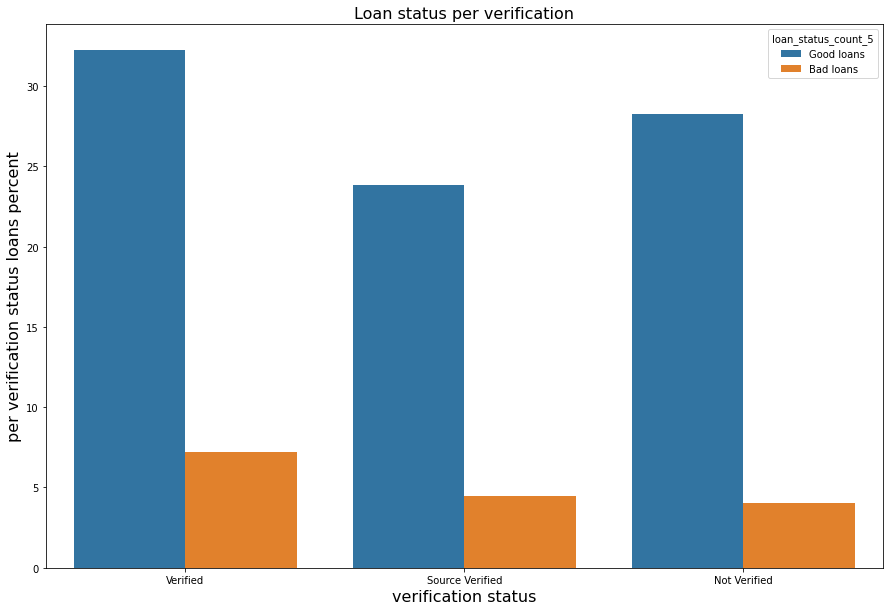

In [39]:
# ratio of housing for good loans customer and bad loans customer
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0, "Does not meet the credit policy. Status:Fully Paid" : 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 0, "Does not meet the credit policy. Status:Charged Off":0}
dataset["loan_status_count_5"] = dataset["loan_status"].map(loan_status_dict)
dataset["loan_status_count_5"] = dataset["loan_status_count_5"].astype("float")
f_loan_status_home, ax_loan_status_home = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
dataset["loan_status_count_5"] = dataset["loan_status_count_5"].map(loan_status_dict)
sns.barplot(x=dataset["verification_status"], y=dataset["loan_amnt"], hue=dataset["loan_status_count_5"],
            hue_order=labels,
            ax=ax_loan_status_home, estimator=lambda x: len(x) / len(dataset["loan_status_count_5"]) * 100)
ax_loan_status_home.set_title("Loan status per verification", fontsize=16)
ax_loan_status_home.set_xlabel("verification status", fontsize=16)
ax_loan_status_home.set_ylabel("per verification status loans percent", fontsize=16)
plt.show()
plt.close()
dataset.drop(["loan_status_count_5"], axis=1, inplace=True)

# 7. Issue Date

In [40]:
dataset.issue_d = pd.to_datetime(dataset.issue_d, format='%b-%y')

split the available date into month and year column.

In [41]:
dataset['issue_yr']=pd.DatetimeIndex(dataset['issue_d']).year
dataset['issue_month']=pd.DatetimeIndex(dataset['issue_d']).month

In [42]:
dataset.issue_yr.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_yr, dtype: int64

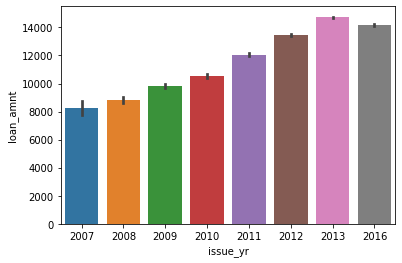

In [43]:
sns.barplot(x='issue_yr', y='loan_amnt', data=dataset)
plt.show()

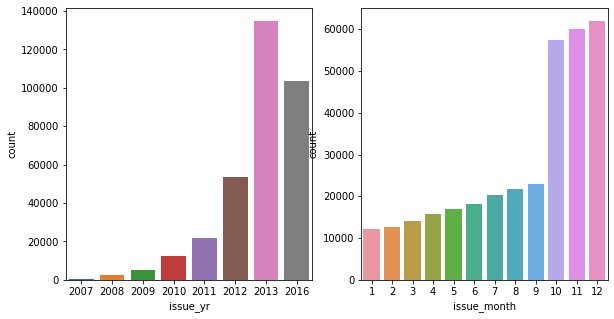

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.countplot(dataset['issue_yr'], order=sorted(dataset.issue_yr.unique()))

plt.subplot(1, 3, 2)
sns.countplot(dataset['issue_month'], order=sorted(dataset.issue_month.unique()))

# 8. Loan Status

In [45]:
defaulter = 0
non_defaulter = 0
for i in dataset.loan_status:
    if(i in ['Default','Charged Off','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']):
        defaulter+=1
    else:
        non_defaulter+=1
print(defaulter)
print(non_defaulter)

52494
281768


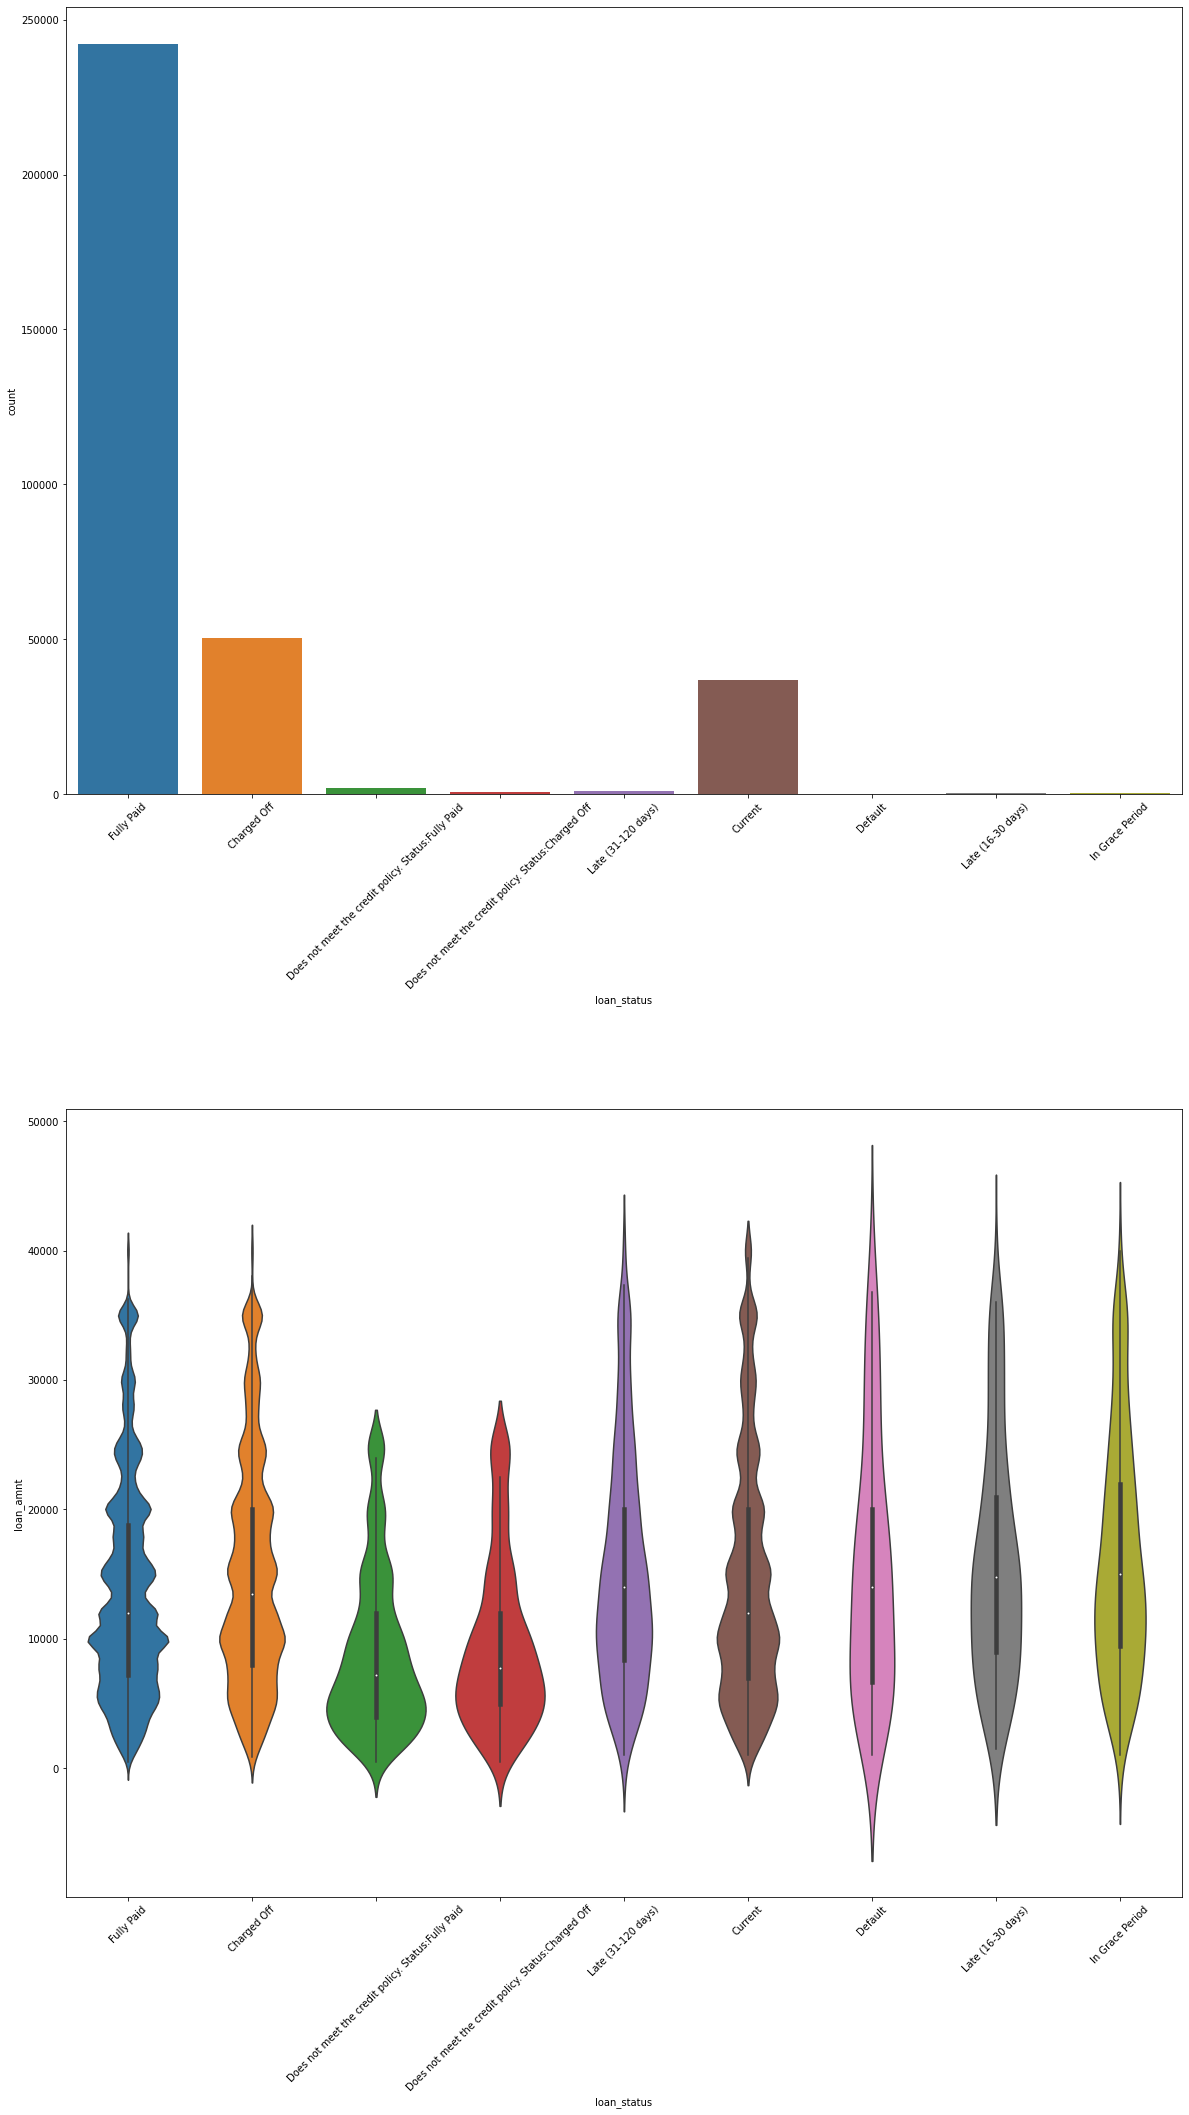

In [46]:
fig, ax =plt.subplots(2,1,figsize=(20,30))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

s0 = sns.countplot(x="loan_status", data=dataset,ax=ax[0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)


s1 = sns.violinplot(x="loan_status", y="loan_amnt", data=dataset,ax=ax[1] , estimator=sum)
#s2 = sns.violinplot(x=totalloansOverStatus.index, y=totalloansOverStatus["Total Loan Amount"],ax=ax[2] )
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

plt.show()

# 9. Purpose

In [47]:
dataset['purpose'].value_counts()

debt_consolidation    190974
credit_card            69177
home_improvement       20895
other                  20703
major_purchase          8439
small_business          5953
car                     4728
medical                 3741
moving                  2438
wedding                 2336
vacation                2138
house                   1993
educational              422
renewable_energy         325
Name: purpose, dtype: int64

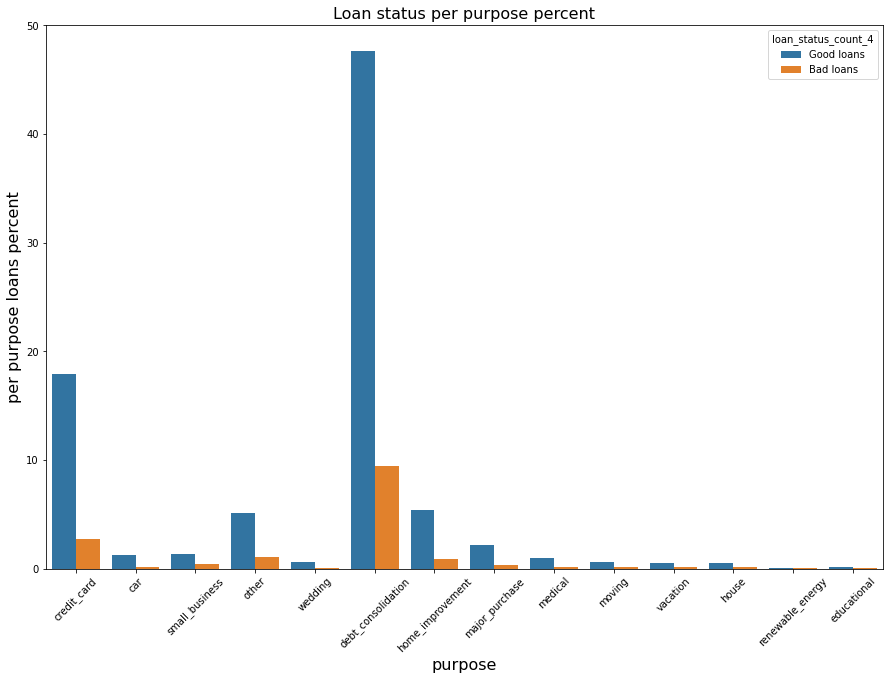

In [48]:
# the ratio of good loans and bad loans for each loan purpose
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0, "Does not meet the credit policy. Status:Fully Paid" : 1,
                    "In Grace Period": 1, "Late (16-30 days)": 1, "Default": 0, "Does not meet the credit policy. Status:Charged Off":0}
dataset["loan_status_count_4"] = dataset["loan_status"].map(loan_status_dict)
dataset["loan_status_count_4"] = dataset["loan_status_count_4"].astype("float")
f_loan_status_purpose, ax_loan_status_purpose = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
dataset["loan_status_count_4"] = dataset["loan_status_count_4"].map(loan_status_dict)
sns.barplot(x=dataset["purpose"], y=dataset["loan_amnt"], hue=dataset["loan_status_count_4"], hue_order=labels,
            ax=ax_loan_status_purpose, estimator=lambda x: len(x) / len(dataset["loan_status_count_4"]) * 100)
ax_loan_status_purpose.set_title("Loan status per purpose percent", fontsize=16)
ax_loan_status_purpose.set_xticklabels(ax_loan_status_purpose.get_xticklabels(), rotation=45)
ax_loan_status_purpose.set_xlabel("purpose", fontsize=16)
ax_loan_status_purpose.set_ylabel("per purpose loans percent", fontsize=16)
plt.show()
plt.close()
dataset.drop(["loan_status_count_4"], axis=1, inplace=True)

# 10. DTI

In [49]:
dataset.dti.describe()

count    334234.000000
mean          0.001712
std           0.000909
min           0.000000
25%           0.001121
50%           0.001677
75%           0.002265
max           0.099900
Name: dti, dtype: float64

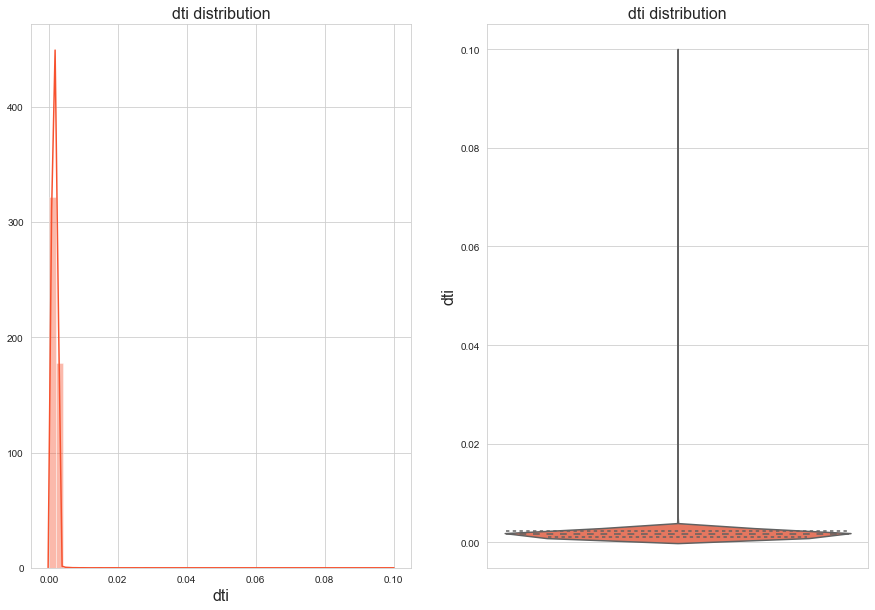

In [50]:
loan_data_dti = dataset[dataset["dti"] <= 100.0]
#loan_data_dti = dataset[loan_data_dti["dti"] > 0.0]
sns.set_style("whitegrid")
f_dti, ax_dti = plt.subplots(1, 2, figsize=(15, 10))
sns.distplot(loan_data_dti["dti"], ax=ax_dti[0], color="#F7522F")
sns.violinplot(y=loan_data_dti["dti"], ax=ax_dti[1], inner="quartile", palette="Reds")
ax_dti[0].set_title("dti distribution", fontsize=16)
ax_dti[1].set_title("dti distribution", fontsize=16)
ax_dti[0].set_xlabel("dti", fontsize=16)
ax_dti[1].set_ylabel("dti", fontsize=16)
plt.show()
plt.close()

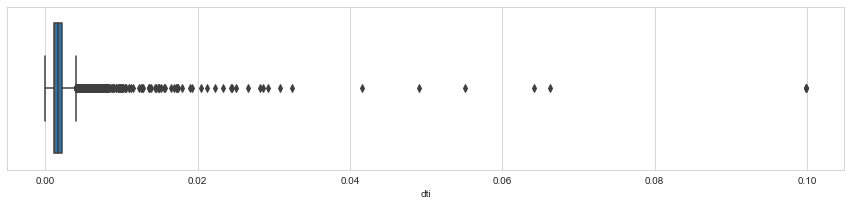

In [110]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=dataset['dti'], data=dataset)

# Data Transformation

In [52]:
# checking for the number of null values in each column 
num_column = []
length = []
for i in dataset.columns:
    if (dataset[str(i)].isnull().any().any()):
        #print(i)
        num_column.append(i)
        num_column.append(dataset[str(i)].isnull().sum())

#num_column = nan_col, length
print(num_column)

['annual_inc', 4, 'dti', 28, 'inq_last_6mths', 29, 'open_acc', 29, 'pub_rec', 29, 'revol_util', 298, 'total_acc', 29, 'pub_rec_bankruptcies', 1365]


In [53]:
# Checking the unique values in each column
num_column = []
length = []
for i in dataset.columns:
    num_column.append(i)
    num_column.append(len(dataset[str(i)].value_counts()))
        #print(i)
    
        
print(num_column)

['loan_amnt', 1498, 'term', 2, 'grade', 7, 'home_ownership', 6, 'annual_inc', 24098, 'verification_status', 3, 'issue_d', 82, 'loan_status', 9, 'purpose', 14, 'dti', 4211, 'fico_range_high', 48, 'inq_last_6mths', 28, 'open_acc', 65, 'pub_rec', 21, 'revol_bal', 52828, 'revol_util', 1204, 'total_acc', 110, 'initial_list_status', 2, 'total_pymnt', 286866, 'pub_rec_bankruptcies', 9, 'issue_yr', 8, 'issue_month', 12]


In [54]:
# checking the number of catagorical variables in our dataset
dataset.select_dtypes(include=["object"]).head()

,term,grade,home_ownership,verification_status,loan_status,purpose,revol_util,initial_list_status
0,36 months,B,RENT,Verified,Fully Paid,credit_card,83.70%,f
1,60 months,C,RENT,Source Verified,Charged Off,car,9.40%,f
2,36 months,C,RENT,Not Verified,Fully Paid,small_business,98.50%,f
3,36 months,C,RENT,Source Verified,Fully Paid,other,21%,f
4,60 months,B,RENT,Source Verified,Fully Paid,other,53.90%,f


In [55]:
dataset.select_dtypes(include=["float64","int64"]).head()

,loan_amnt,annual_inc,dti,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,pub_rec_bankruptcies,issue_yr,issue_month
0,5000,24000.0,0.002765,739,1.0,3.0,0.0,13648,9.0,5863.155187,0.0,2011,12
1,2500,30000.0,0.000100,744,5.0,3.0,0.0,1687,4.0,1014.530000,0.0,2011,12
2,2400,12252.0,0.000872,739,2.0,2.0,0.0,2956,10.0,3005.666844,0.0,2011,12
3,10000,49200.0,0.002000,694,1.0,10.0,0.0,5598,37.0,12231.890000,0.0,2011,12
4,3000,80000.0,0.001794,699,0.0,15.0,0.0,27783,38.0,4066.908161,0.0,2011,12


In [56]:
#CONVERT 'term' FROM STRING TO INT, REMOVING THE 'months' WORD
dataset.term = dataset.term.str.split(" ").str[1].astype(float)

#REMOVE '%' FROM 'revol_util' TO CONVERT IT INTO NUMBERIC DATA
dataset.revol_util = pd.Series(dataset.revol_util).str.replace('%', '').astype(float)

#replace 'None' & 'Any' with 'Other' FROM 'home_ownership'
dataset['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

Applying Label encoding for other features (columns) to convert into numerical values

In [57]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [58]:
#grade: [(A,0),(B,1), (C,2), (D,3), (E,4), (F,5), (G,6)]
dataset.grade = lb_make.fit_transform(dataset.grade)

#home_ownership: [((MORTGAGE,0),(OTHER,1),(OWN,2),(RENT,3)]
dataset.home_ownership = lb_make.fit_transform(dataset.home_ownership)

#verification_status : [(Not Verified,0),(Source Verified,1),(Verified,2)]
dataset.verification_status = lb_make.fit_transform(dataset.verification_status)

#purpose : [(car,0),(credit_card,1),(debt_consolidation,2),(educational,3),(home_improvement,4),(house,5),(major_purchase,6),(medical,7),(moving,8),(other,9),(renewable_energy,10),(small_business,11),(vacation,12),(wedding,13)]
dataset.purpose = lb_make.fit_transform(dataset.purpose)

#initial_list_status : [(f,0),(w,1)]
dataset.initial_list_status = lb_make.fit_transform(dataset.initial_list_status)

#issue_d
dataset.issue_d = lb_make.fit_transform(dataset.issue_d)

In [59]:
dataset.loan_status.replace(['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet credit policy. Status Charged Off', 'Does not meet the credit policy. Status:Charged Off'],1,inplace=True)

In [60]:
dataset.loan_status.replace(['Current', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Does not meet credit policy. Status Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'],0,inplace=True)

In [61]:
dataset[dataset.issue_yr == 2016].loan_status.value_counts()

0    87154
1    16392
Name: loan_status, dtype: int64

# Filling up missing values

As we have fewer missing value than the orignal dataset, we would use k-Neareast Neighbor (kNN) Imputation to handle the missing data

In [62]:
from sklearn.impute import KNNImputer
K = KNNImputer(n_neighbors=5)
d = dataset.columns
cat = K.fit_transform(dataset)

In [63]:
df = pd.DataFrame(cat, columns=d)

In [64]:
df.head()

,loan_amnt,term,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,pub_rec_bankruptcies,issue_yr,issue_month
0,5000.0,36.0,1.0,3.0,24000.0,2.0,54.0,0.0,1.0,0.002765,...,3.0,0.0,13648.0,83.7,9.0,0.0,5863.155187,0.0,2011.0,12.0
1,2500.0,60.0,2.0,3.0,30000.0,1.0,54.0,1.0,0.0,0.000100,...,3.0,0.0,1687.0,9.4,4.0,0.0,1014.530000,0.0,2011.0,12.0
2,2400.0,36.0,2.0,3.0,12252.0,0.0,54.0,0.0,11.0,0.000872,...,2.0,0.0,2956.0,98.5,10.0,0.0,3005.666844,0.0,2011.0,12.0
3,10000.0,36.0,2.0,3.0,49200.0,1.0,54.0,0.0,9.0,0.002000,...,10.0,0.0,5598.0,21.0,37.0,0.0,12231.890000,0.0,2011.0,12.0
4,3000.0,60.0,1.0,3.0,80000.0,1.0,54.0,0.0,9.0,0.001794,...,15.0,0.0,27783.0,53.9,38.0,0.0,4066.908161,0.0,2011.0,12.0


# Outliers Treatment

In [65]:
#outliers=[]
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean=np.mean(data)
    std= np.std(data)
    
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers 

In [68]:
cat_cols=list(df.select_dtypes(include=['object']).columns)
num_cols=list(df.select_dtypes(exclude=['object']).columns)

In [69]:
for k in num_cols:
    outliers_pt=detect_outliers(df[k])
    print(len(outliers_pt))
    LOWERBOUND=-3*np.std(df[k])+ np.mean(df[k])
    UPPERBOUND = 3*np.std(df[k])+ np.mean(df[k])
    #np.clip(full_df[k], a_min=LOWERBOUND, a_max=UPPERBOUND)
    df[k].clip(LOWERBOUND, UPPERBOUND, inplace= True)
    #print(i)

1147
0
2108
0
2842
0
6957
0
10427
417
4673
7095
3295
5725
4124
5
3199
0
3565
1328
603
0


# Train/test split

In [70]:
Train =df[df.issue_yr!=2016]
Test = df[df.issue_yr== 2016]
Train.shape, Test.shape

((230716, 22), (103546, 22))

In [88]:
x_train = Train.drop(columns=['loan_status','issue_yr', 'issue_month'])
y_train = Train['loan_status']
x_test = Test.drop(columns=['loan_status','issue_yr', 'issue_month'])
y_test = Test['loan_status']

In [89]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((230716, 19), (230716,), (103546, 19), (103546,))

# Decision Tree Classification

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
tree = DecisionTreeClassifier(max_depth=3)

In [92]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [93]:
predictions = tree.predict(x_test)

In [94]:
predictions[:5]

array([0., 0., 0., 1., 0.])

In [95]:
y_test[:5]

230716    0.0
230717    0.0
230718    0.0
230719    0.0
230720    0.0
Name: loan_status, dtype: float64

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [97]:
accuracy_score(y_test, predictions)

0.8371158712069998

In [111]:
confusion_mat = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=["Good Loan",'Bad Loan'],\
                            columns=['Predicted Good','Predicted Bad'])
confusion_df

,Predicted Good,Predicted Bad
Good Loan,78082,9072
Bad Loan,7794,8598


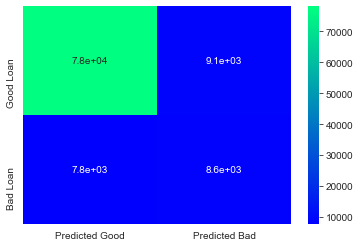

In [112]:
_=sns.heatmap(confusion_df, cmap="winter", annot=True)

In [115]:
# CONFUSION MATRIX EVALUATION METRIC

print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8371158712069998
Precision: 0.4865874363327674
Recall: 0.5245241581259151


In [124]:
# CALCULATE ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score

In [125]:
probs_dt = tree.predict_proba(x_test)[::,1]

In [126]:
auc = roc_auc_score(y_test, probs_dt)
print(auc)

0.7602135092140351


In [127]:
fpr, tpr, threshold = roc_curve(y_test, probs_dt)

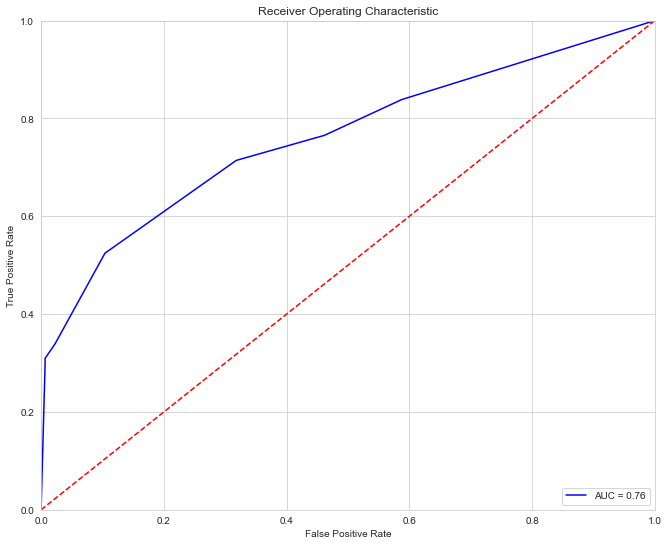

In [128]:
plt.figure(figsize=(11,9))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RANDOM FOREST CLASSIFIER 

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = [{"max_depth":[3,4,5,None], "max_features":[2,3,4,5,None]}]

In [102]:
gs = GridSearchCV(estimator=RandomForestClassifier(random_state=101),\
                 param_grid = param_grid,\
                 cv=10)

In [103]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                

In [104]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': 5, 'max_features': 2},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': None},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': None}]

In [105]:
# PRINT BEST HYPERPARAMETERS COMBINATION

gs.best_params_

{'max_depth': None, 'max_features': None}

In [106]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [107]:
gs_predictions = gs.predict(x_test)

In [108]:
accuracy_score(y_test, gs_predictions)

0.8397137504104456

In [113]:
confusion_mat_gs = confusion_matrix(y_test, gs_predictions)
confusion_GS = pd.DataFrame(confusion_mat_gs, index=['Good Loan','Bad Loan'], columns=['Predicted Good','Predicted Bad'])
confusion_GS

,Predicted Good,Predicted Bad
Good Loan,70946,16208
Bad Loan,389,16003


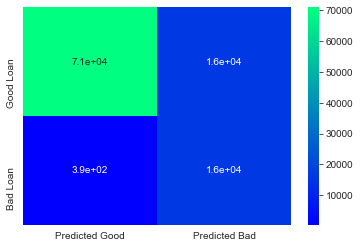

In [114]:
_=sns.heatmap(confusion_GS, cmap="winter", annot=True)

In [116]:
# CONFUSION MATRIX EVALUATION METRIC

print("Accuracy:",metrics.accuracy_score(y_test, gs_predictions))
print("Precision:",metrics.precision_score(y_test, gs_predictions))
print("Recall:",metrics.recall_score(y_test, gs_predictions))

Accuracy: 0.8397137504104456
Precision: 0.4968178572537332
Recall: 0.9762689116642265


In [117]:
# CALCULATE ROC CURVE

from sklearn.metrics import roc_curve, roc_auc_score

In [120]:
probs_gs = gs.predict_proba(x_test)[::,1]

In [121]:
auc = roc_auc_score(y_test, probs_gs)
print(auc)

0.9365001101532096


In [122]:
fpr, tpr, threshold = roc_curve(y_test, probs_gs)

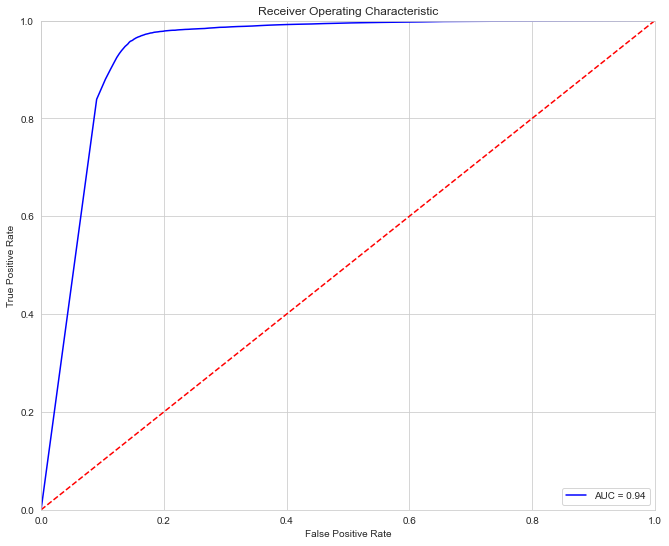

In [123]:
plt.figure(figsize=(11,9))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KEY POINTS

In [ ]:
# Decision Tree & Random Forest have similar Accuracy with  83.97% for later.
# However AUC for Random Forest(0.9365) is significantly higher than Decision Tree Model.
# Recall Score is significantly high for Random Forest i.e, 97.6 %